# 2603655_DataAcquisition

## Week2 20240813

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("pandas version :",pd.__version__)
print("numpy version :",np.__version__)
print("matplotlib version :",mpl.__version__)
print("seaborn version :",sns.__version__)

In [ ]:
df = pd.read_csv('data/thaiglobal_logistics_data_rev2.csv')
df.info()
print()
df['date'] = pd.to_datetime(df['date'])
df.info()

pandas version : 2.2.1
numpy version : 1.26.4
matplotlib version : 3.8.4
seaborn version : 0.13.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   shipment_id              100000 non-null  int64  
 1   date                     100000 non-null  object 
 2   origin                   100000 non-null  object 
 3   destination              100000 non-null  object 
 4   distance_km              100000 non-null  float64
 5   weight_kg                100000 non-null  float64
 6   vehicle_type             100000 non-null  object 
 7   vehicle_age_years        100000 non-null  float64
 8   driver_id                100000 non-null  int64  
 9   customer_id              100000 non-null  int64  
 10  product_type             100000 non-null  object 
 11  delivery_status          100000 non-null  object 
 12  delay_hours      

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   shipment_id              100000 non-null  int64         
 1   date                     100000 non-null  datetime64[ns]
 2   origin                   100000 non-null  object        
 3   destination              100000 non-null  object        
 4   distance_km              100000 non-null  float64       
 5   weight_kg                100000 non-null  float64       
 6   vehicle_type             100000 non-null  object        
 7   vehicle_age_years        100000 non-null  float64       
 8   driver_id                100000 non-null  int64         
 9   customer_id              100000 non-null  int64         
 10  product_type             100000 non-null  object        
 11  delivery_status          100000 non-null  object        
 12  delay_hours      

In [25]:
df.sample(5)

,shipment_id,date,origin,destination,distance_km,weight_kg,vehicle_type,vehicle_age_years,driver_id,customer_id,...,delivery_status,delay_hours,transport_cost,revenue,customer_satisfaction,fuel_consumption_liters,maintenance_cost,month,estimated_delivery_days,actual_delivery_days
4976,4977,2022-02-25,Pattaya,Dubai,7875.58,800.29,Ship,0.2,391,7185,...,On Time,0.0,7292.390,9020.46,4.23,525.04,331.00,2,15.5,15.5
16817,16818,2023-11-23,Khon Kaen,Tokyo,9983.74,335.19,Truck,2.2,304,9883,...,On Time,0.0,13664.016,13407.71,4.65,1663.96,1433.41,11,19.6,19.6
59439,59440,2022-03-18,Khon Kaen,Dubai,2225.54,594.51,Ship,1.7,18,2284,...,On Time,0.0,2274.450,2973.32,4.05,148.37,315.54,3,5.0,5.0
76877,76878,2023-06-11,Khon Kaen,London,4315.55,434.10,Truck,3.9,108,1186,...,On Time,0.0,4318.430,5393.86,4.95,719.26,1380.46,6,8.6,8.6
11229,11230,2022-04-06,Bangkok,Sydney,5324.52,425.48,Ship,0.7,309,1608,...,On Time,0.0,9404.630,11476.69,4.98,354.97,307.21,4,10.5,10.5


In [29]:
# monthly profit

monthly_account =  df.groupby(df['date'].dt.to_period('M')).agg({
                'revenue': 'sum',
                'transport_cost': 'sum'    
                })
monthly_account.head(3)

,revenue,transport_cost
date,,
2022-01,64505893.21,5.946697e+07
2022-02,56953176.98,4.388651e+07
2022-03,61959106.92,4.765455e+07


In [31]:
monthly_account['profit']=monthly_account['revenue']-monthly_account['transport_cost']
monthly_account.sample(5)
monthly_account.reset_index(inplace=True)  # return index to data
monthly_account.head(3)

,date,revenue,transport_cost,profit
0,2022-01,64505893.21,5.946697e+07,5.038928e+06
1,2022-02,56953176.98,4.388651e+07,1.306667e+07
2,2022-03,61959106.92,4.765455e+07,1.430456e+07


In [33]:
# incorrect datatype
monthly_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   date            24 non-null     period[M]
 1   revenue         24 non-null     float64  
 2   transport_cost  24 non-null     float64  
 3   profit          24 non-null     float64  
dtypes: float64(3), period[M](1)
memory usage: 900.0 bytes


In [35]:
monthly_account['date']=monthly_account['date'].dt.to_timestamp()  # convert period[M]

In [37]:
monthly_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            24 non-null     datetime64[ns]
 1   revenue         24 non-null     float64       
 2   transport_cost  24 non-null     float64       
 3   profit          24 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 900.0 bytes


In [39]:
display(monthly_account.head())

,date,revenue,transport_cost,profit
0,2022-01-01,64505893.21,5.946697e+07,5.038928e+06
1,2022-02-01,56953176.98,4.388651e+07,1.306667e+07
2,2022-03-01,61959106.92,4.765455e+07,1.430456e+07
3,2022-04-01,60246340.15,4.621082e+07,1.403552e+07
4,2022-05-01,61202418.39,4.710198e+07,1.410044e+07


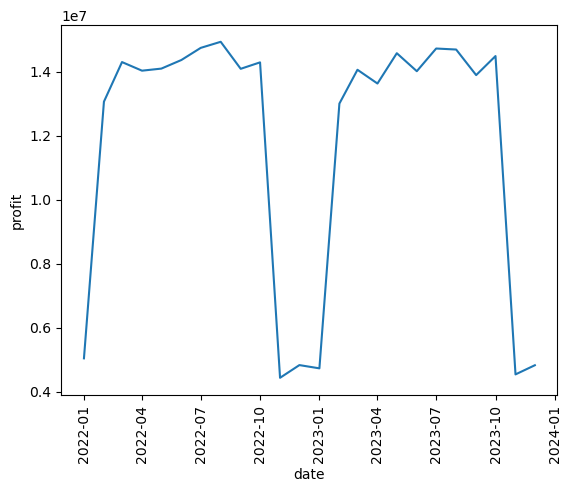

In [41]:
sns.lineplot(x='date', y='profit', data=monthly_account)
plt.xticks(rotation =90)
plt.show();

In [43]:
df_pivot = pd.pivot_table(df,
                        values= ['revenue'],
                        index= ['product_type'],
                        columns=['vehicle_type'],
                        aggfunc='mean'
                         )
display(df_pivot)

revenue                                         
vehicle_type      Airplane         Ship         Truck           Van
product_type                                                       
Chemicals     25086.184756  8410.889696  10047.015170  15007.327386
Clothing      25481.135423  8480.123260  10112.406903  15152.432217
Electronics   25484.015738  8464.738120   9866.680302  14946.345908
Food          25268.412850  8275.193262  10033.277017  15434.090581
Machinery     25212.967887  8517.525087  10066.952517  15136.138337

In [45]:
df_pivot = pd.pivot_table(df,
                        values= ['revenue','transport_cost'],
                        index= ['product_type'],
                        columns=['vehicle_type'],
                        aggfunc='mean'
                         )
display(df_pivot)

revenue                                           \
vehicle_type      Airplane         Ship         Truck           Van   
product_type                                                          
Chemicals     25086.184756  8410.889696  10047.015170  15007.327386   
Clothing      25481.135423  8480.123260  10112.406903  15152.432217   
Electronics   25484.015738  8464.738120   9866.680302  14946.345908   
Food          25268.412850  8275.193262  10033.277017  15434.090581   
Machinery     25212.967887  8517.525087  10066.952517  15136.138337   

             transport_cost                                          
vehicle_type       Airplane         Ship        Truck           Van  
product_type                                                         
Chemicals      20296.100733  6812.009689  8113.350972  12150.215326  
Clothing       20512.046665  6831.637215  8189.826214  12204.338072  
Electronics    20617.649567  6850.663683  7966.091188  12075.578572  
Food           20452.930575  6684.248932  8084.654159  12476.585687  
Machinery      20333.960100  6898.124275  8133.699055  12229.310567

### Split pivot table into x

In [56]:
idx = pd.IndexSlice
print(type(idx))
df_revenue = df_pivot.loc[:,idx['revenue']]
df_revenue

<class 'pandas.core.indexing._IndexSlice'>


vehicle_type,Airplane,Ship,Truck,Van
product_type,,,,
Chemicals,25086.184756,8410.889696,10047.015170,15007.327386
Clothing,25481.135423,8480.123260,10112.406903,15152.432217
Electronics,25484.015738,8464.738120,9866.680302,14946.345908
Food,25268.412850,8275.193262,10033.277017,15434.090581
Machinery,25212.967887,8517.525087,10066.952517,15136.138337


In [448]:
df_revenue_plot = df_revenue.reset_index()
df_revenue_plot

vehicle_type,product_type,Airplane,Ship,Truck,Van
0,Chemicals,25086.184756,8410.889696,10047.015170,15007.327386
1,Clothing,25481.135423,8480.123260,10112.406903,15152.432217
2,Electronics,25484.015738,8464.738120,9866.680302,14946.345908
3,Food,25268.412850,8275.193262,10033.277017,15434.090581
4,Machinery,25212.967887,8517.525087,10066.952517,15136.138337


In [449]:
df_revenue_plot = df_revenue_plot.melt(id_vars='product_type',var_name='vehicle_type',value_name='revenue')

In [453]:
df_revenue_plot.head()

,product_type,vehicle_type,revenue
0,Chemicals,Airplane,25086.184756
1,Clothing,Airplane,25481.135423
2,Electronics,Airplane,25484.015738
3,Food,Airplane,25268.412850
4,Machinery,Airplane,25212.967887


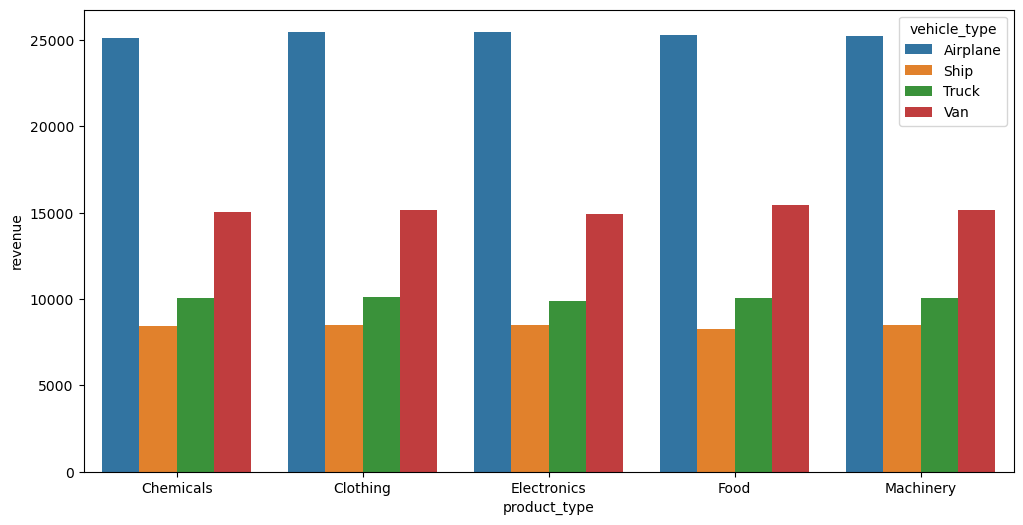

In [454]:
sns.barplot(x='product_type',y='revenue', hue='vehicle_type',data=df_revenue_plot)
plt.show();

In [58]:
# float64_columns = df.select_dtypes(include=['number']).columns
float64_columns = df.select_dtypes(include=['float64']).columns
float64_columns

Index(['shipment_id', 'distance_km', 'weight_kg', 'vehicle_age_years',
       'driver_id', 'customer_id', 'delay_hours', 'transport_cost', 'revenue',
       'customer_satisfaction', 'fuel_consumption_liters', 'maintenance_cost',
       'month', 'estimated_delivery_days', 'actual_delivery_days'],
      dtype='object')

### Descriptive Analysis: numerical

In [117]:
df_float64= df[float64_columns].copy()
df_float64.describe()

,shipment_id,distance_km,weight_kg,vehicle_age_years,driver_id,customer_id,delay_hours,transport_cost,revenue,customer_satisfaction,fuel_consumption_liters,maintenance_cost,month,estimated_delivery_days,actual_delivery_days
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5056.177089,499.856165,4.000002,250.576970,5009.989070,4.311429,11920.787213,14755.357262,4.148388,769.858055,1351.788514,6.514820,10.113554,10.293197
std,28867.657797,2858.384931,498.976837,2.827351,144.260646,2888.397596,11.756899,10420.322537,12918.814306,0.814009,584.092110,1027.253772,3.444747,5.737222,5.756020
min,1.000000,100.020000,0.000000,0.000000,1.000000,1.000000,0.000000,73.540000,84.700000,1.000000,6.670000,16.520000,1.000000,-1.500000,-1.500000
25%,25000.750000,2580.897500,144.067500,1.900000,126.000000,2501.000000,0.000000,4505.447500,5564.860000,4.060000,312.835000,632.325000,4.000000,5.200000,5.300000
50%,50000.500000,5054.525000,346.395000,3.400000,250.000000,5014.500000,0.000000,8998.323000,11126.750000,4.370000,610.880000,1069.470000,7.000000,10.100000,10.300000
75%,75000.250000,7530.455000,693.515000,5.400000,376.000000,7527.000000,0.000000,15966.691500,19819.617500,4.690000,1117.332500,1769.747500,9.000000,15.100000,15.200000
max,100000.000000,9999.790000,6065.410000,29.100000,500.000000,10000.000000,71.990000,71965.800000,87872.730000,5.000000,2499.690000,11422.090000,12.000000,21.500000,23.492917


In [119]:
df_float64.skew()

shipment_id                0.000000
distance_km               -0.001926
weight_kg                  1.972593
vehicle_age_years          1.410813
driver_id                 -0.001318
customer_id               -0.006595
delay_hours                3.507071
transport_cost             1.687783
revenue                    1.690532
customer_satisfaction     -1.676963
fuel_consumption_liters    0.947196
maintenance_cost           1.885022
month                     -0.012452
estimated_delivery_days   -0.002103
actual_delivery_days       0.000644
dtype: float64

In [121]:
df_descriptive = df_float64.describe().T
df_descriptive

,count,mean,std,min,25%,50%,75%,max
shipment_id,100000.0,50000.500000,28867.657797,1.00,25000.7500,50000.500,75000.2500,100000.000000
distance_km,100000.0,5056.177089,2858.384931,100.02,2580.8975,5054.525,7530.4550,9999.790000
weight_kg,100000.0,499.856165,498.976837,0.00,144.0675,346.395,693.5150,6065.410000
vehicle_age_years,100000.0,4.000002,2.827351,0.00,1.9000,3.400,5.4000,29.100000
driver_id,100000.0,250.576970,144.260646,1.00,126.0000,250.000,376.0000,500.000000
customer_id,100000.0,5009.989070,2888.397596,1.00,2501.0000,5014.500,7527.0000,10000.000000
delay_hours,100000.0,4.311429,11.756899,0.00,0.0000,0.000,0.0000,71.990000
transport_cost,100000.0,11920.787213,10420.322537,73.54,4505.4475,8998.323,15966.6915,71965.800000
revenue,100000.0,14755.357262,12918.814306,84.70,5564.8600,11126.750,19819.6175,87872.730000
customer_satisfaction,100000.0,4.148388,0.814009,1.00,4.0600,4.370,4.6900,5.000000


In [123]:
# conbine
df_descriptive['skew'] = df_float64.skew()
df_descriptive['kurtosis'] = df_float64.kurtosis()
df_descriptive

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
shipment_id,100000.0,50000.500000,28867.657797,1.00,25000.7500,50000.500,75000.2500,100000.000000,0.000000,-1.200000
distance_km,100000.0,5056.177089,2858.384931,100.02,2580.8975,5054.525,7530.4550,9999.790000,-0.001926,-1.198613
weight_kg,100000.0,499.856165,498.976837,0.00,144.0675,346.395,693.5150,6065.410000,1.972593,5.762083
vehicle_age_years,100000.0,4.000002,2.827351,0.00,1.9000,3.400,5.4000,29.100000,1.410813,3.040891
driver_id,100000.0,250.576970,144.260646,1.00,126.0000,250.000,376.0000,500.000000,-0.001318,-1.200660
customer_id,100000.0,5009.989070,2888.397596,1.00,2501.0000,5014.500,7527.0000,10000.000000,-0.006595,-1.204778
delay_hours,100000.0,4.311429,11.756899,0.00,0.0000,0.000,0.0000,71.990000,3.507071,12.957184
transport_cost,100000.0,11920.787213,10420.322537,73.54,4505.4475,8998.323,15966.6915,71965.800000,1.687783,3.385469
revenue,100000.0,14755.357262,12918.814306,84.70,5564.8600,11126.750,19819.6175,87872.730000,1.690532,3.379613
customer_satisfaction,100000.0,4.148388,0.814009,1.00,4.0600,4.370,4.6900,5.000000,-1.676963,2.266631


### Descriptive Analysis: categorical

In [126]:
str_columns = df.select_dtypes(include=['object']).columns
for col in str_columns:
    print(df[col].value_counts())

origin
Chiang Mai    20090
Khon Kaen     20064
Bangkok       20004
Phuket        19922
Pattaya       19920
Name: count, dtype: int64
destination
New York     16741
London       16706
Dubai        16681
Singapore    16669
Tokyo        16629
Sydney       16574
Name: count, dtype: int64
vehicle_type
Airplane    25228
Ship        24998
Van         24929
Truck       24845
Name: count, dtype: int64
product_type
Food           20208
Clothing       20100
Machinery      20078
Chemicals      19848
Electronics    19766
Name: count, dtype: int64
delivery_status
On Time         79946
Delayed         14948
Very Delayed     5106
Name: count, dtype: int64


In [128]:
from PIL import Image

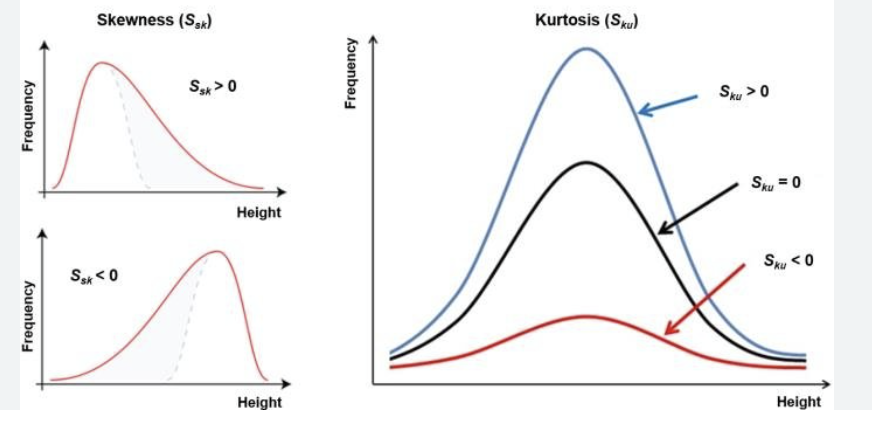

In [130]:
img = Image.open('figure/skew_kurtosis.png')
display(img)

## Graphical analysis

In [133]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [135]:
# darkgrid, whitegrid, dark, white, and ticks
sns.set_style('ticks')

In [137]:
plt.rcParams['figure.figsize']=(12,6)  # 1200*600

### Lineplot

In [140]:
monthly_account =  df.groupby(df['date'].dt.to_period('M')).agg({
                'revenue': 'sum',
                'transport_cost': 'sum'    
                })
monthly_account.reset_index(inplace=True)
monthly_account['date']=monthly_account['date'].dt.to_timestamp()  # convert period[M]

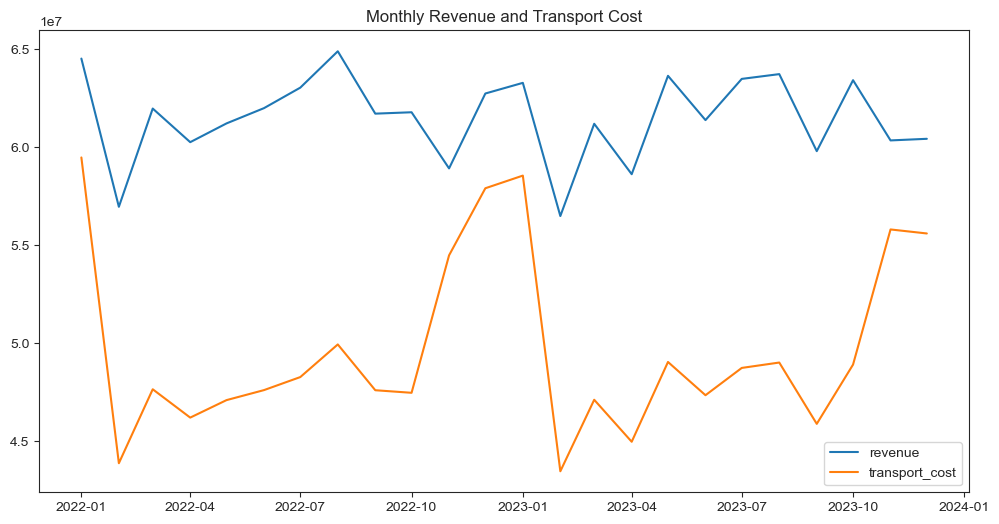

<Figure size 1200x600 with 0 Axes>

In [142]:
plt.plot(monthly_account['date'],monthly_account['revenue'],label='revenue')
plt.plot(monthly_account['date'],monthly_account['transport_cost'],label='transport_cost')
plt.title('Monthly Revenue and Transport Cost')
plt.legend()
plt.show()
plt.savefig('figure/monthly_trend.png')

### Scatter

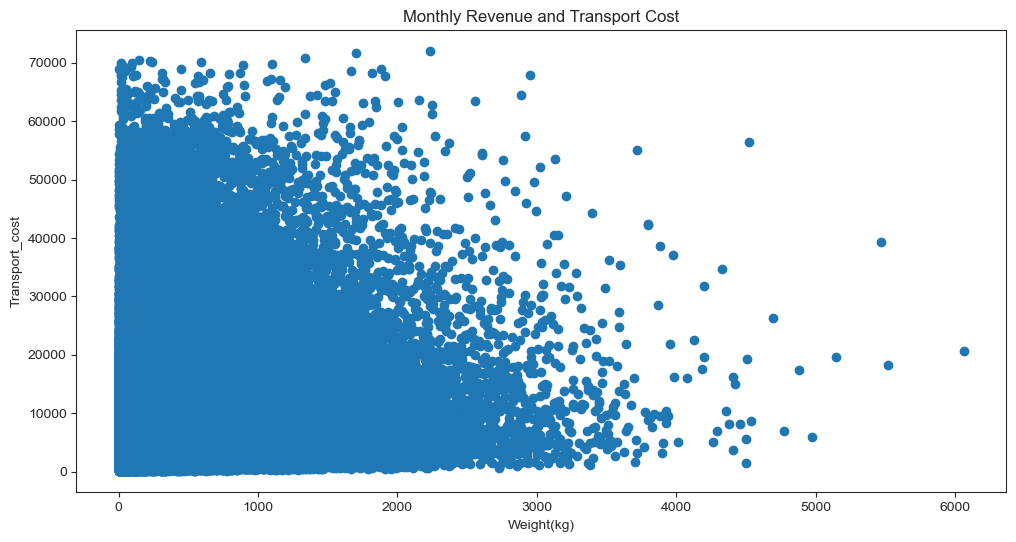

In [145]:
plt.scatter(x=df['weight_kg'],y=df['transport_cost'])
plt.xlabel('Weight(kg)')
plt.ylabel('Transport_cost')
plt.title('Monthly Revenue and Transport Cost')

plt.show();

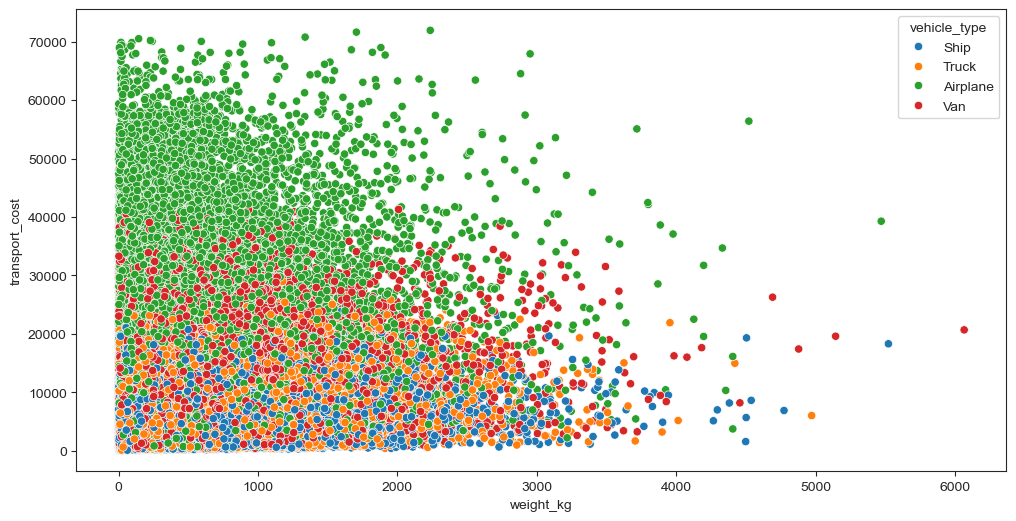

In [146]:
sns.scatterplot(x=df['weight_kg'],y=df['transport_cost'],hue=df['vehicle_type'])
plt.show();

### Histogram

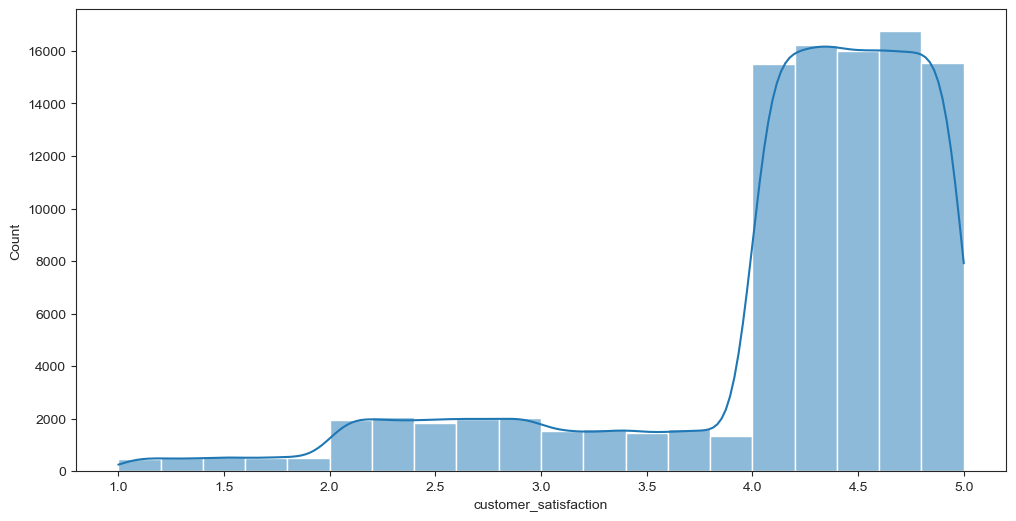

In [150]:
sns.histplot(df['customer_satisfaction'],bins=20,kde=True)
plt.show();

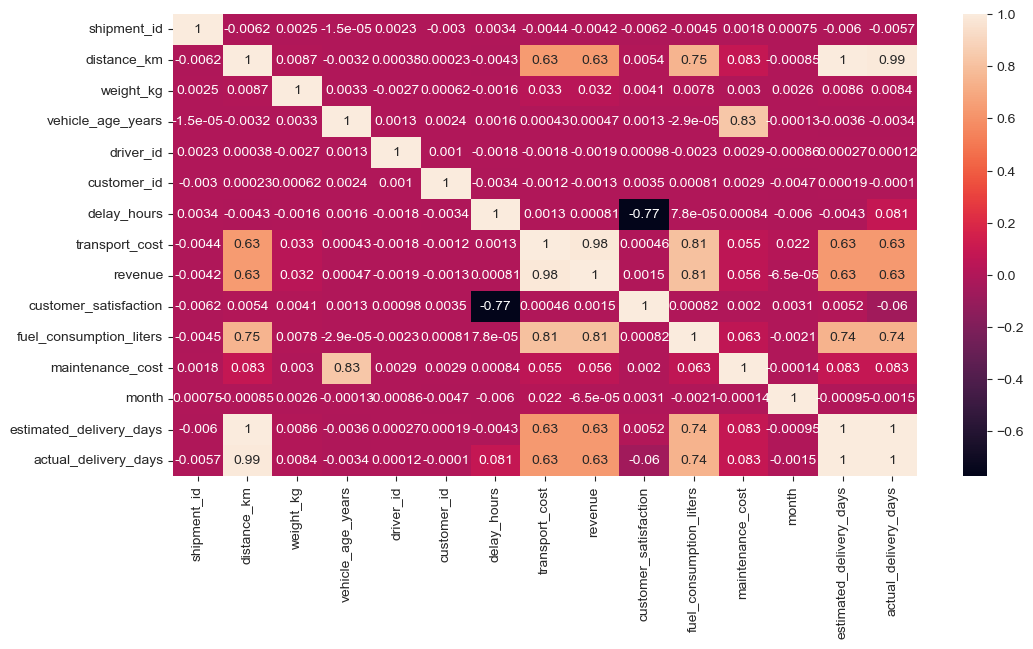

In [151]:
df_corr = df_float64.corr()
sns.heatmap(df_corr,annot=True)
plt.show();

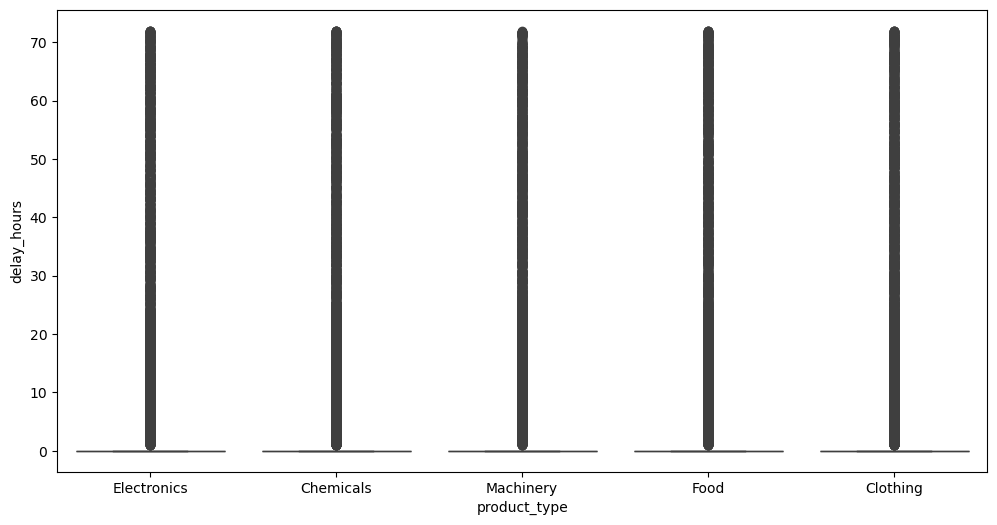

In [480]:
sns.boxplot(x='product_type',y='delay_hours',data=df)
plt.show();

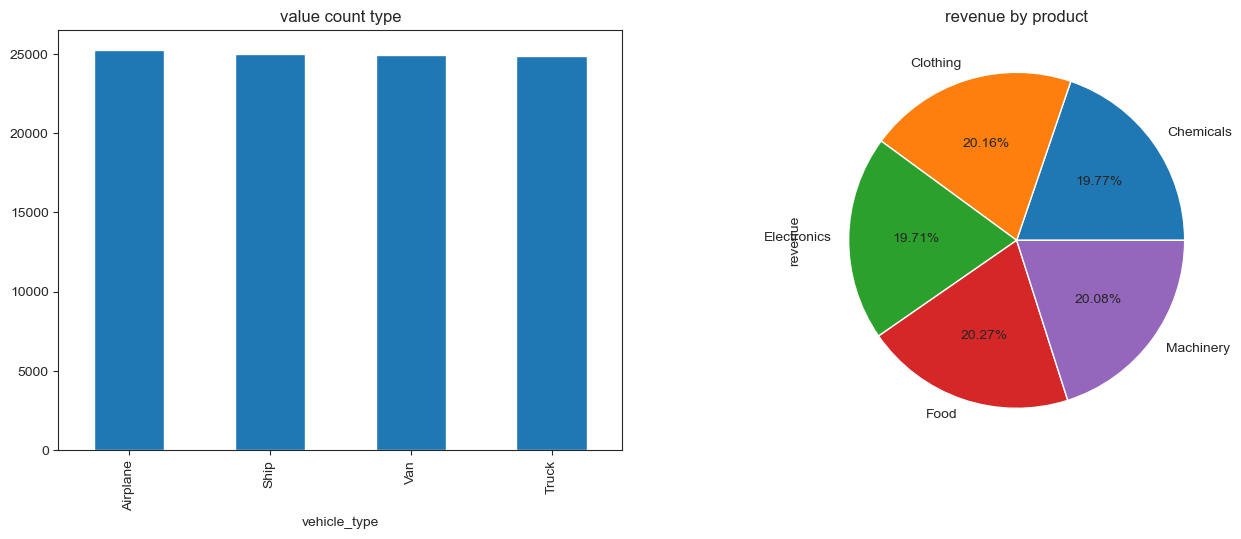

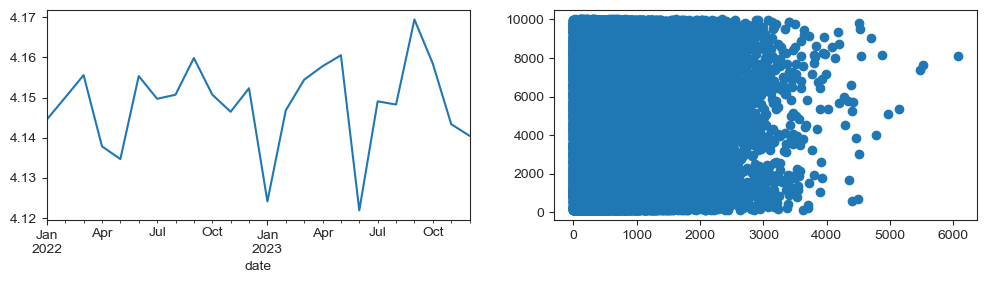

In [157]:
# plt.clf()
plt.figure(figsize=(16,12)) #width*height
plt.subplot(2,2,1) # (3,2)  row=3, column=2
df['vehicle_type'].value_counts().plot(kind='bar')
plt.title("value count type")

plt.subplot(2,2,2)
df.groupby(by=['product_type'])['revenue'].sum().plot(kind='pie',autopct= '%1.2f%%')
plt.title("revenue by product")
plt.show();

plt.subplot(2,2,3)
df.groupby(by=df['date'].dt.to_period('M'))['customer_satisfaction'].mean().plot(kind='line')   # skip step

plt.subplot(2,2,4)
plt.scatter(x=df['weight_kg'], y=df['distance_km'])
plt.show();

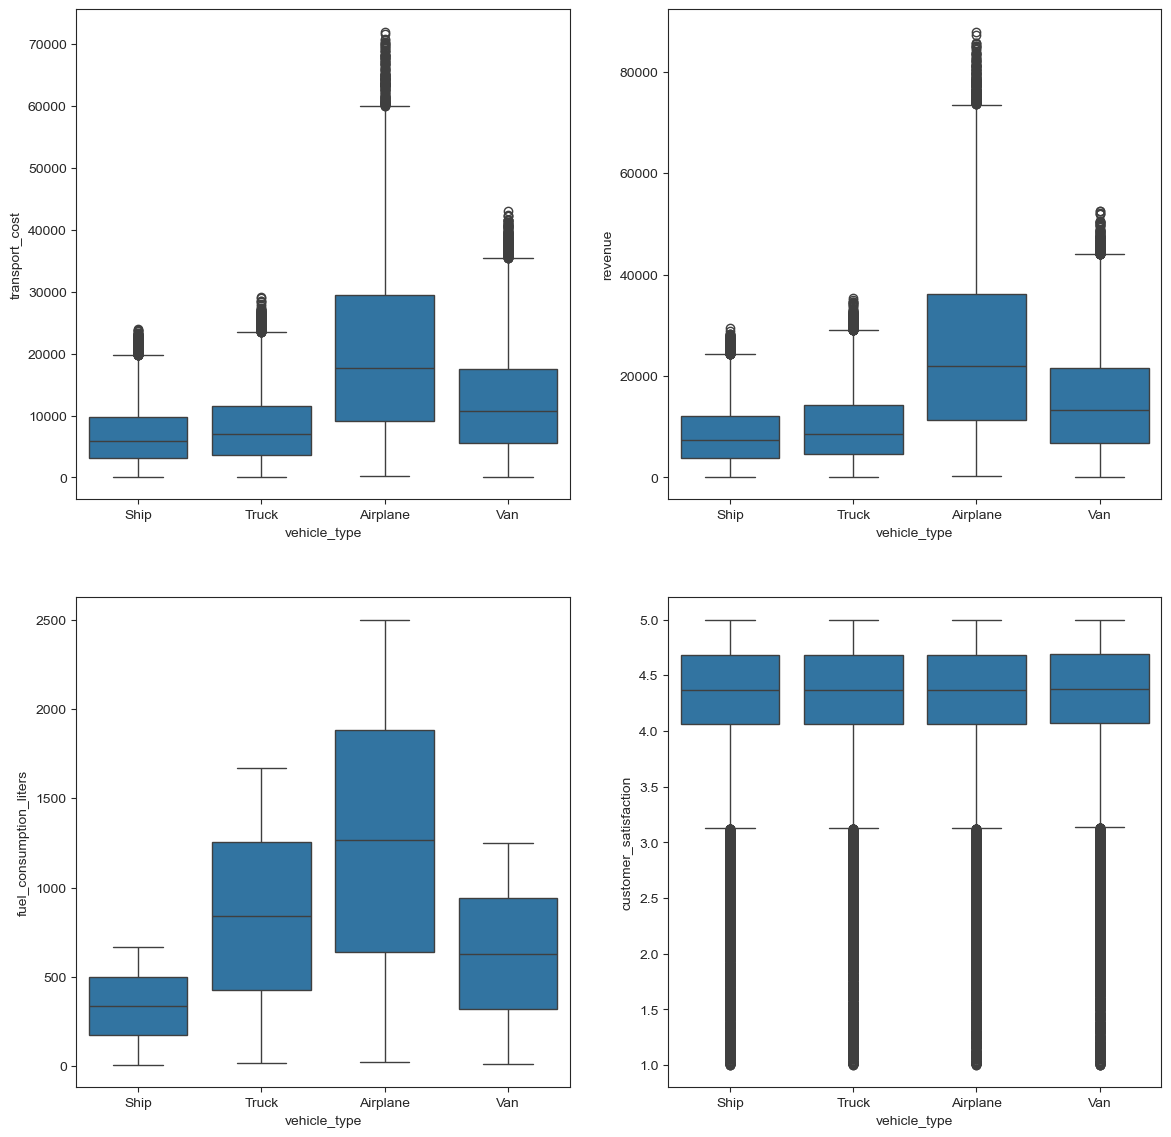

In [159]:
# plt.clf()
fig,axes = plt.subplots(2,2,figsize=(14,14))

var= ['transport_cost','revenue','fuel_consumption_liters','customer_satisfaction']

for i, var in enumerate(var):
    row = i // 2
    col = i % 2
    sns.boxplot(x='vehicle_type',y=var,ax=axes[row,col],data=df)
plt.show();

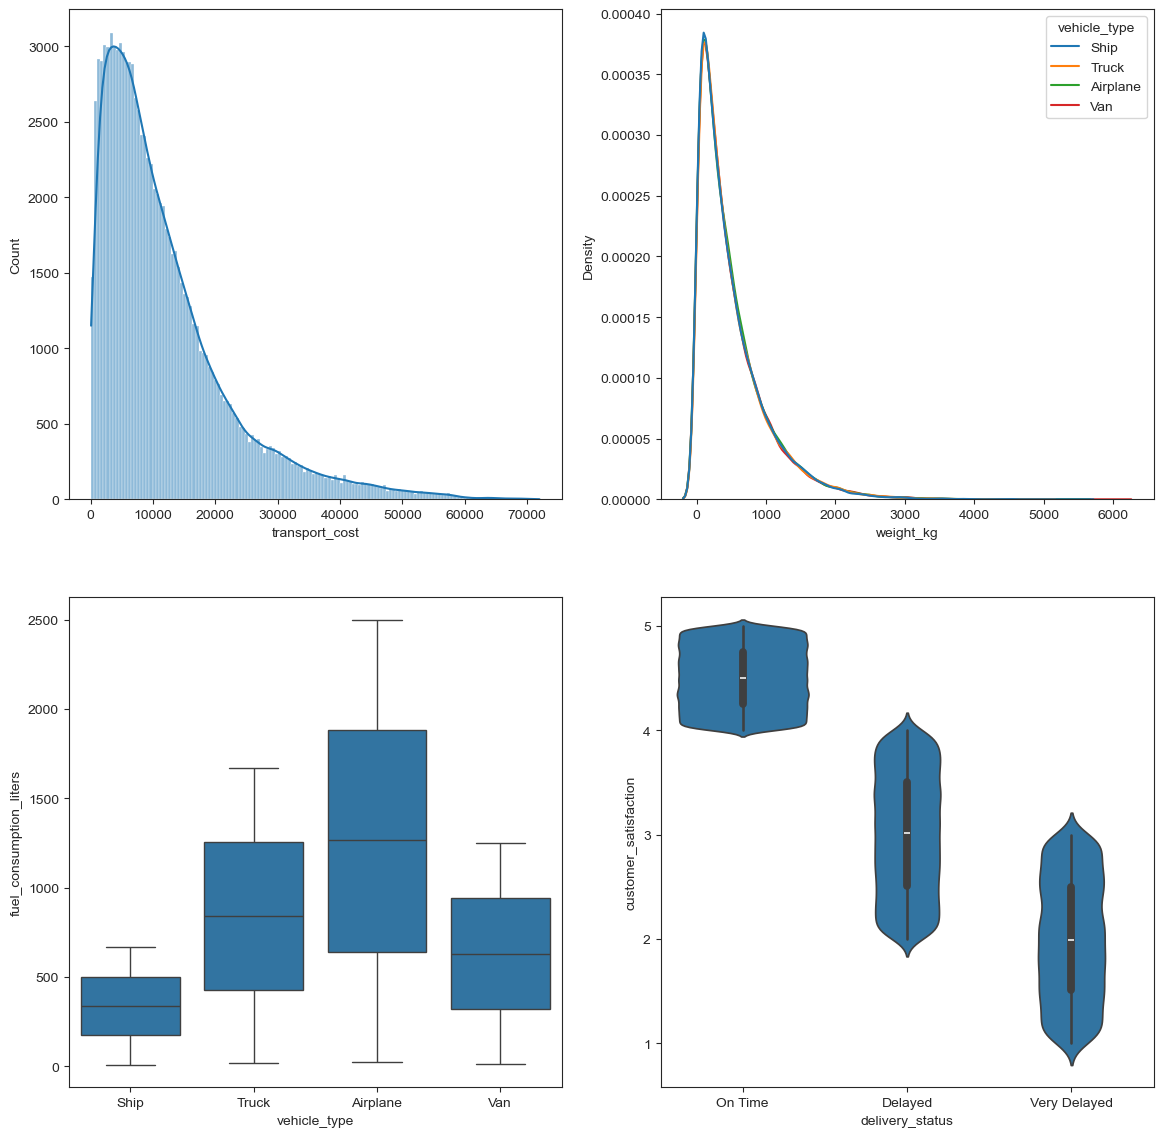

In [161]:
# plt.clf()
fig,axes = plt.subplots(2,2,figsize=(14,14))

sns.histplot(x='transport_cost', data=df, kde=True, ax=axes[0,0])
sns.kdeplot(x='weight_kg', data=df, hue='vehicle_type', ax=axes[0,1])
sns.boxplot(x='vehicle_type', y='fuel_consumption_liters', data=df, ax=axes[1,0])
sns.violinplot(x='delivery_status', y='customer_satisfaction', data=df, ax=axes[1,1])
# histogram, boxplot, kde

plt.show()

### Swarmplot 

C:\Users\khala\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\khala\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\khala\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\khala\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\khala\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.0% of the points

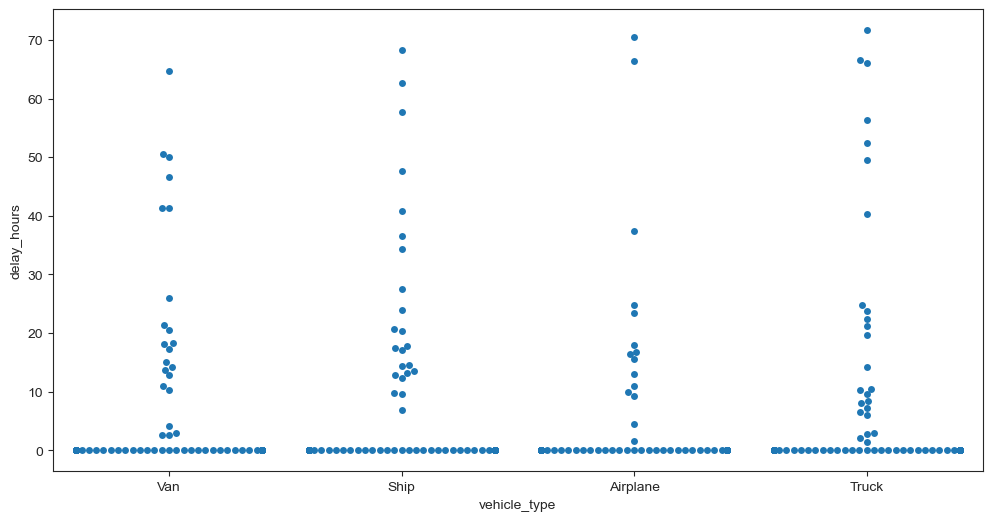

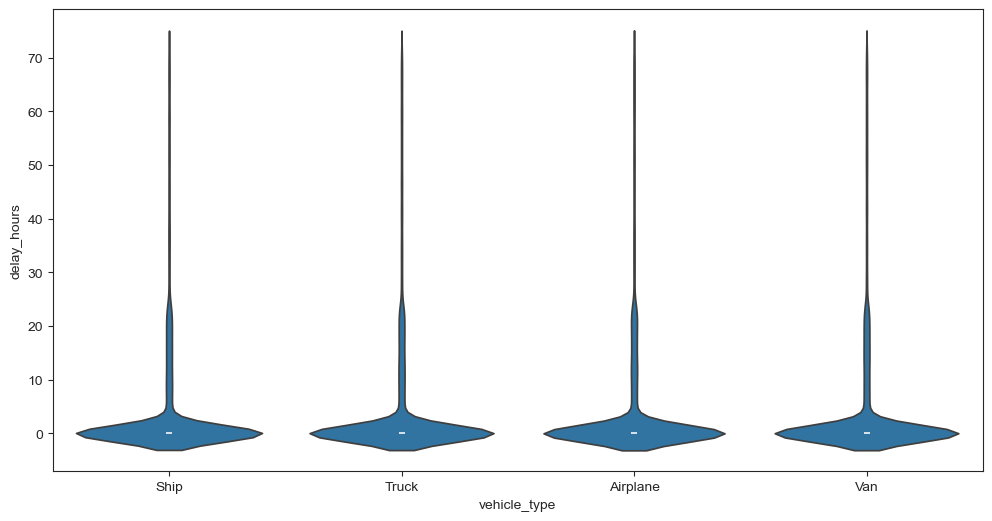

In [164]:
plt.clf()
sns.swarmplot(x='vehicle_type',y='delay_hours', data=df.sample(500))
plt.show()
sns.violinplot(x='vehicle_type',y='delay_hours',data=df)
plt.show()